<a href="https://colab.research.google.com/github/nishat09/Risk-Factor-Analysis-For-Cervical-Cancer/blob/main/Risk_Factor_Analysis_For_Cervical_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 858.000000                858.000000   
mean    26.820513                   2.511655                 16.995338   
std      8.497948                   1.644759                  2.791883   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          858.000000  858.000000      858.000000           858.000000   
mean             2.257576    0.143357        1.201241             0.446278   
std              1.400981    0.350641        4.060623             2.210351   
min              0.00

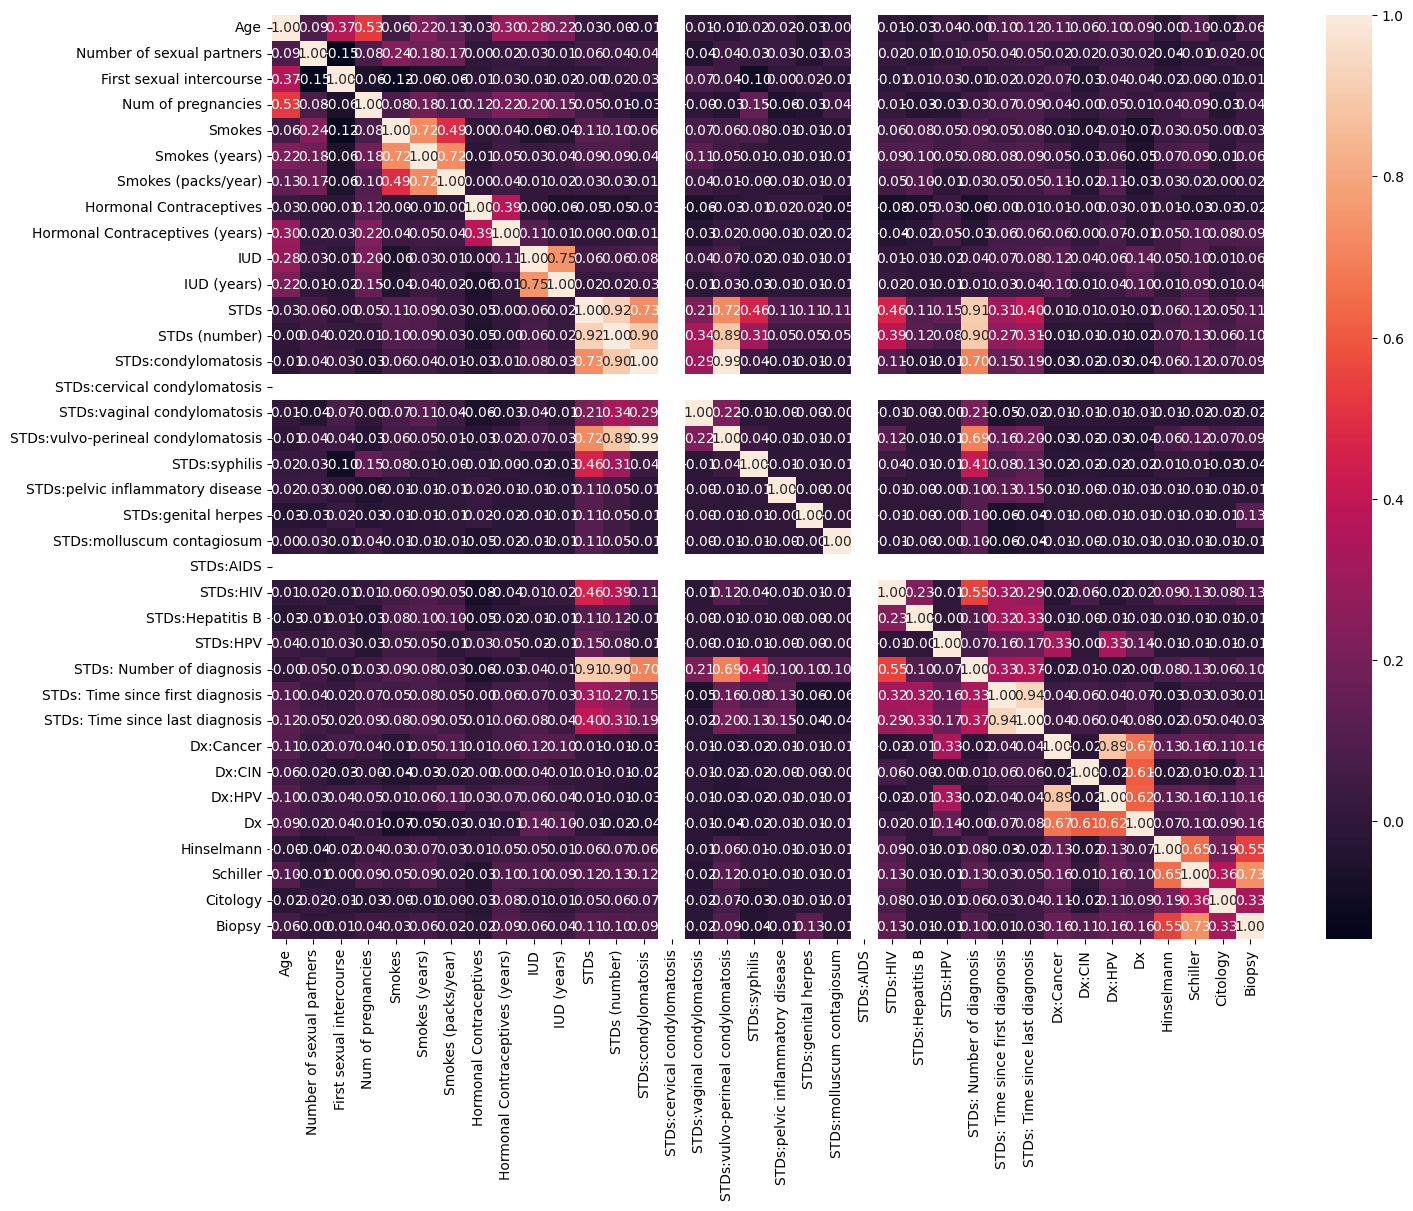

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/kag_risk_factors_cervical_cancer.csv'
data = pd.read_csv(file_path)

# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Convert appropriate columns to numeric
numeric_columns = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
                   'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
                   'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
                   'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                   'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                   'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
                   'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
                   'STDs: Time since last diagnosis']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values (e.g., using median imputation)
data.fillna(data.median(), inplace=True)

# Statistical summary
print(data.describe())

# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '/content/kag_risk_factors_cervical_cancer.csv'
cervical_cancer_data = pd.read_csv(file_path)

# Replace '?' with NaN
cervical_cancer_data.replace('?', np.nan, inplace=True)

# Convert columns to numeric where possible
cervical_cancer_data = cervical_cancer_data.apply(pd.to_numeric, errors='coerce')

# Define the age categories
age_bins = [0, 20, 30, 45, 60]
age_labels = ['below 20', '20-29', '30-44', '45-60']

# Categorize 'Age'
cervical_cancer_data['Age Category'] = pd.cut(cervical_cancer_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Define the categories for 'First sexual intercourse'
fsi_bins = [0, 13, 16, 18, 20, np.inf]
fsi_labels = ['below 13', '13-15', '16-17', '18-19', 'above 20']

# Categorize 'First sexual intercourse'
cervical_cancer_data['First Sexual Intercourse Category'] = pd.cut(cervical_cancer_data['First sexual intercourse'], bins=fsi_bins, labels=fsi_labels, right=False)

# Select the most important features for a positive biopsy
important_features = ['Age Category', 'Number of sexual partners', 'First Sexual Intercourse Category', 'Num of pregnancies',
                      'Smokes', 'Smokes (years)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'Biopsy']

# Extract the important features
extracted_data = cervical_cancer_data[important_features]

# Display the first few rows of the preprocessed data
print(extracted_data.head())

# Save the preprocessed data to a new CSV file
extracted_data.to_csv('/content/New Microsoft Excel Worksheet.xlsx', index=False)


  Age Category  Number of sexual partners First Sexual Intercourse Category  \
0     below 20                        4.0                             13-15   
1     below 20                        1.0                             13-15   
2        30-44                        1.0                               NaN   
3        45-60                        5.0                             16-17   
4        45-60                        3.0                          above 20   

   Num of pregnancies  Smokes  Smokes (years)  Hormonal Contraceptives  \
0                 1.0     0.0             0.0                      0.0   
1                 1.0     0.0             0.0                      0.0   
2                 1.0     0.0             0.0                      0.0   
3                 4.0     1.0            37.0                      1.0   
4                 4.0     0.0             0.0                      1.0   

   Hormonal Contraceptives (years)  IUD  Biopsy  
0                             

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold, cross_val_score


# Load the CSV file
file_path = '/content/kag_risk_factors_cervical_cancer.csv'
cervical_cancer_data = pd.read_csv(file_path)

# Replace '?' with NaN
cervical_cancer_data.replace('?', np.nan, inplace=True)

# Convert columns to numeric where possible
cervical_cancer_data = cervical_cancer_data.apply(pd.to_numeric, errors='coerce')

# Define the age categories
age_bins = [0, 20, 30, 45, 60]
age_labels = ['below 20', '20-29', '30-44', '45-60']

# Categorize 'Age'
cervical_cancer_data['Age Category'] = pd.cut(cervical_cancer_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Define the categories for 'First sexual intercourse'
fsi_bins = [0, 13, 16, 18, 20, np.inf]
fsi_labels = ['below 13', '13-15', '16-17', '18-19', 'above 20']

# Categorize 'First sexual intercourse'
cervical_cancer_data['First Sexual Intercourse Category'] = pd.cut(cervical_cancer_data['First sexual intercourse'], bins=fsi_bins, labels=fsi_labels, right=False)

# Select the most important features for a positive biopsy
important_features = ['Age Category', 'Number of sexual partners', 'First Sexual Intercourse Category', 'Num of pregnancies',
                      'Smokes', 'Smokes (years)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'Biopsy']

# Extract the important features
extracted_data = cervical_cancer_data[important_features]

# Drop rows with any missing values
extracted_data.dropna(inplace=True)

# Convert categorical features to numeric using one-hot encoding
extracted_data = pd.get_dummies(extracted_data, columns=['Age Category', 'First Sexual Intercourse Category'])

# Define feature columns and target column
feature_columns = list(extracted_data.columns.difference(['Biopsy']))
target_column = 'Biopsy'

# Split data into features and target
X = extracted_data[feature_columns]
y = extracted_data[target_column]

# Concatenate the features and target
data = pd.concat([X, y], axis=1)

# Separate the majority and minority classes
majority_class = data[data.Biopsy == 0]
minority_class = data[data.Biopsy == 1]

# Oversample the minority class
minority_class_oversampled = resample(minority_class,
                                      replace=True,     # sample with replacement
                                      n_samples=len(majority_class),    # to match majority class
                                      random_state=42)  # reproducible results

# Combine the majority class with the oversampled minority class
balanced_data = pd.concat([majority_class, minority_class_oversampled])

# Split the data into features and target
X_balanced = balanced_data.drop('Biopsy', axis=1)
y_balanced = balanced_data['Biopsy']

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

accuracy, classification_report_str

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.4f}')
print(f'Standard deviation of cross-validation scores: {np.std(cv_scores):.4f}')


<ipython-input-3-c5cbb8c977c4>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data.dropna(inplace=True)


0.9678714859437751
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       129
           1       0.94      0.99      0.97       120

    accuracy                           0.97       249
   macro avg       0.97      0.97      0.97       249
weighted avg       0.97      0.97      0.97       249

Cross-validation scores: [0.98393574 0.97590361 0.97590361 0.97188755 0.96774194]
Mean cross-validation score: 0.9751
Standard deviation of cross-validation scores: 0.0054


<ipython-input-4-824f3d3ef22a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cervical_cancer_data, x='Age Category', palette='viridis')


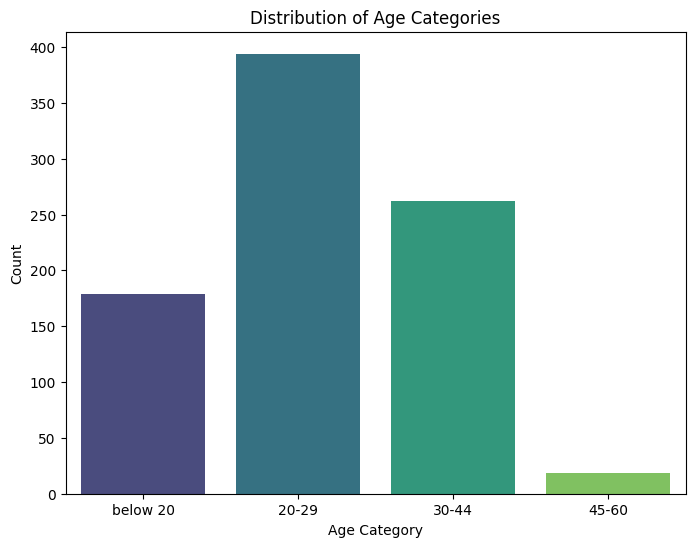

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=cervical_cancer_data, x='Age Category', palette='viridis')
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()


<ipython-input-5-da15a2ef165a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cervical_cancer_data, x='First Sexual Intercourse Category', palette='viridis')


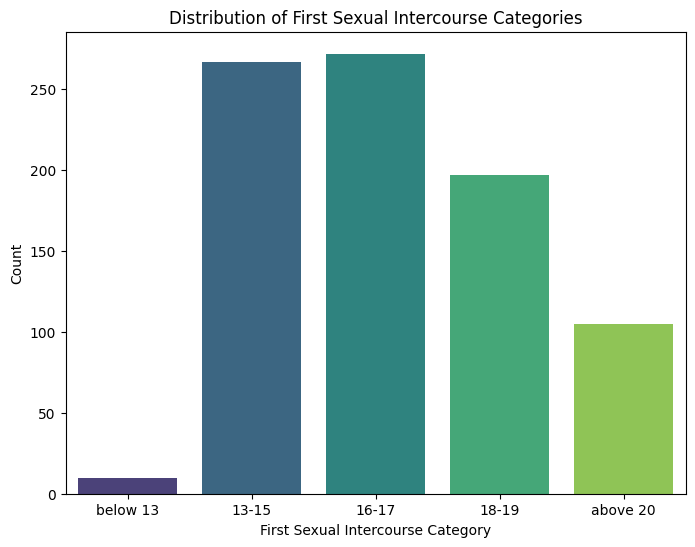

In [ ]:
# Distribution of First Sexual Intercourse Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=cervical_cancer_data, x='First Sexual Intercourse Category', palette='viridis')
plt.title('Distribution of First Sexual Intercourse Categories')
plt.xlabel('First Sexual Intercourse Category')
plt.ylabel('Count')
plt.show()


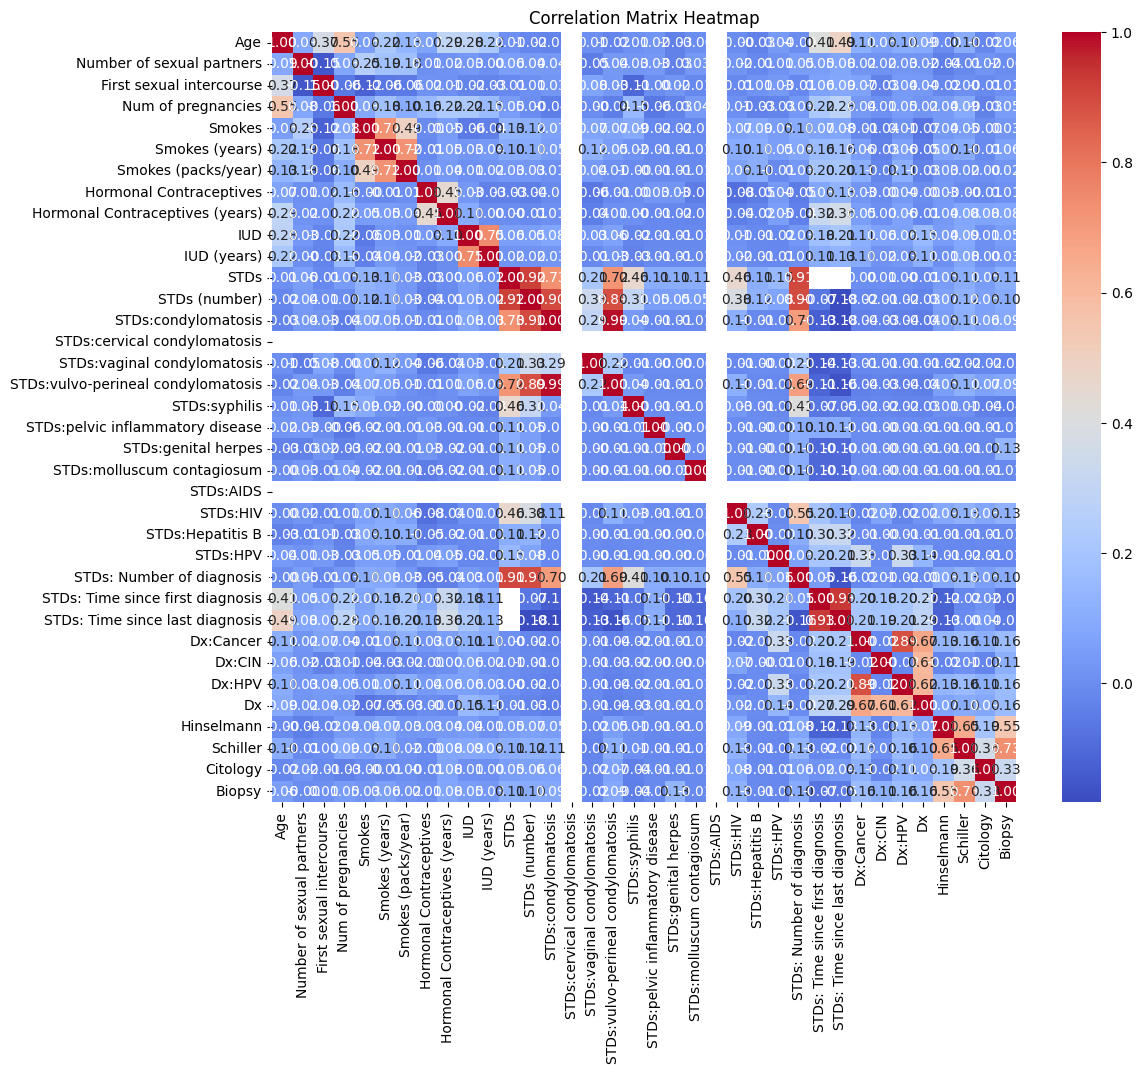

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_columns = cervical_cancer_data.select_dtypes(include=[np.number]).columns
correlation_matrix = cervical_cancer_data[numeric_columns].corr()

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


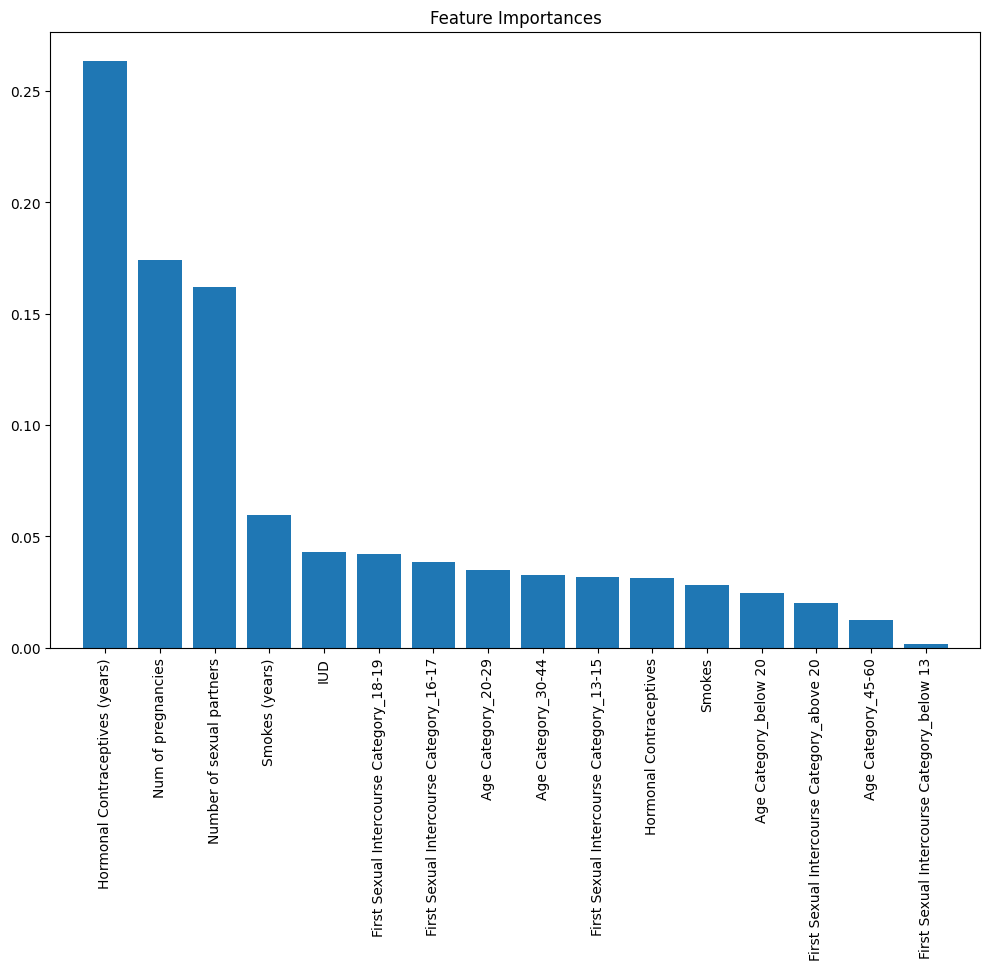

In [ ]:
# Feature Importance Plot
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


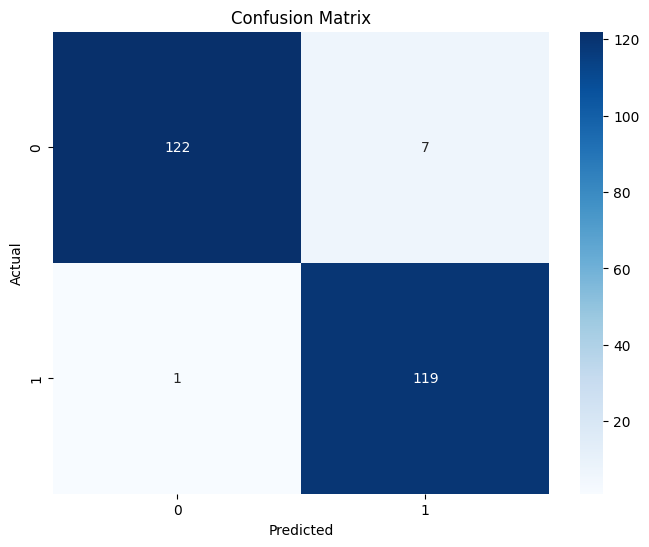

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Select only numeric columns for the correlation matrix
numeric_columns = extracted_data.select_dtypes(include=[np.number]).columns
correlation_matrix = extracted_data[numeric_columns].corr()

# Display the correlation matrix
correlation_matrix['Biopsy'].sort_values(ascending=False)


Biopsy                             1.000000
Hormonal Contraceptives (years)    0.078774
IUD                                0.073540
Num of pregnancies                 0.049190
Smokes (years)                     0.037942
Smokes                             0.025960
Hormonal Contraceptives            0.013802
Number of sexual partners          0.003240
Name: Biopsy, dtype: float64

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '/content/kag_risk_factors_cervical_cancer.csv'
cervical_cancer_data = pd.read_csv(file_path)

# Replace '?' with NaN
cervical_cancer_data.replace('?', np.nan, inplace=True)

# Convert columns to numeric where possible
cervical_cancer_data = cervical_cancer_data.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = cervical_cancer_data.corr()

# Display the correlations with Biopsy
correlation_with_biopsy = correlation_matrix['Biopsy'].sort_values(ascending=False)
print(correlation_with_biopsy)


Biopsy                                1.000000
Schiller                              0.733204
Hinselmann                            0.547417
Citology                              0.327466
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
STDs:genital herpes                   0.132526
STDs:HIV                              0.126880
Dx:CIN                                0.113172
STDs                                  0.109099
STDs (number)                         0.098347
STDs: Number of diagnosis             0.097449
STDs:vulvo-perineal condylomatosis    0.088902
STDs:condylomatosis                   0.086390
Hormonal Contraceptives (years)       0.079388
Smokes (years)                        0.062044
Age                                   0.055956
IUD                                   0.053194
Num of pregnancies                    0.046416
IUD (years)                           0.033275
Smokes       

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the classifier
svm_model = SVC(probability=True, random_state=42)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_cv_scores = cross_val_score(svm_model, X_balanced, y_balanced, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print(f'SVM Cross-validation scores: {svm_cv_scores}')
print(f'SVM Mean cross-validation score: {np.mean(svm_cv_scores):.4f}')
print(f'SVM Standard deviation of cross-validation scores: {np.std(svm_cv_scores):.4f}')


0.9678714859437751
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       129
           1       0.94      0.99      0.97       120

    accuracy                           0.97       249
   macro avg       0.97      0.97      0.97       249
weighted avg       0.97      0.97      0.97       249

SVM Cross-validation scores: [0.73092369 0.69076305 0.66666667 0.72690763 0.68951613]
SVM Mean cross-validation score: 0.7010
SVM Standard deviation of cross-validation scores: 0.0244


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
logreg_model = LogisticRegression(max_iter=10000, random_state=42)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logreg_cv_scores = cross_val_score(logreg_model, X_balanced, y_balanced, cv=cv, scoring='accuracy')

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print the cross-validation scores
print(f'Logistic Regression Cross-validation scores: {logreg_cv_scores}')
print(f'Logistic Regression Mean cross-validation score: {np.mean(logreg_cv_scores):.4f}')
print(f'Logistic Regression Standard deviation of cross-validation scores: {np.std(logreg_cv_scores):.4f}')


0.9678714859437751
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       129
           1       0.94      0.99      0.97       120

    accuracy                           0.97       249
   macro avg       0.97      0.97      0.97       249
weighted avg       0.97      0.97      0.97       249

Logistic Regression Cross-validation scores: [0.56626506 0.53815261 0.53012048 0.59036145 0.52016129]
Logistic Regression Mean cross-validation score: 0.5490
Logistic Regression Standard deviation of cross-validation scores: 0.0257


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gb_cv_scores = cross_val_score(gb_model, X_balanced, y_balanced, cv=cv, scoring='accuracy')

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print the cross-validation scores
print(f'Gradient Boosting Cross-validation scores: {gb_cv_scores}')
print(f'Gradient Boosting Mean cross-validation score: {np.mean(gb_cv_scores):.4f}')
print(f'Gradient Boosting Standard deviation of cross-validation scores: {np.std(gb_cv_scores):.4f}')


0.9678714859437751
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       129
           1       0.94      0.99      0.97       120

    accuracy                           0.97       249
   macro avg       0.97      0.97      0.97       249
weighted avg       0.97      0.97      0.97       249

Gradient Boosting Cross-validation scores: [0.89156627 0.87148594 0.81927711 0.88353414 0.89112903]
Gradient Boosting Mean cross-validation score: 0.8714
Gradient Boosting Standard deviation of cross-validation scores: 0.0271


In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize the individual models
svm_model = SVC(probability=True, random_state=42)
logreg_model = LogisticRegression(max_iter=10000, random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Combine the individual models into an ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('logreg', logreg_model),
    ('gb', gb_model),
    ('rf', rf_model)
], voting='soft')

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ensemble_cv_scores = cross_val_score(ensemble_model, X_balanced, y_balanced, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print(f'Ensemble Model Cross-validation scores: {ensemble_cv_scores}')
print(f'Ensemble Model Mean cross-validation score: {np.mean(ensemble_cv_scores):.4f}')
print(f'Ensemble Model Standard deviation of cross-validation scores: {np.std(ensemble_cv_scores):.4f}')


0.9678714859437751
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       129
           1       0.94      0.99      0.97       120

    accuracy                           0.97       249
   macro avg       0.97      0.97      0.97       249
weighted avg       0.97      0.97      0.97       249

Ensemble Model Cross-validation scores: [0.96385542 0.92369478 0.93172691 0.94779116 0.93145161]
Ensemble Model Mean cross-validation score: 0.9397
Ensemble Model Standard deviation of cross-validation scores: 0.0144


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
import numpy as np

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifiers
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Ensemble': VotingClassifier(estimators=[
        ('svm', SVC(probability=True, random_state=42)),
        ('logreg', LogisticRegression(max_iter=10000, random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='soft')
}

# Perform cross-validation and store results
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=cv, scoring='accuracy')
    cv_results[name] = {
        'Cross-validation scores': cv_scores,
        'Mean cross-validation score': np.mean(cv_scores),
        'Standard deviation of cross-validation scores': np.std(cv_scores)
    }

# Print the cross-validation results for each model
for name, results in cv_results.items():
    print(f'{name} Cross-validation scores: {results["Cross-validation scores"]}')
    print(f'{name} Mean cross-validation score: {results["Mean cross-validation score"]:.4f}')
    print(f'{name} Standard deviation of cross-validation scores: {results["Standard deviation of cross-validation scores"]:.4f}')
    print('---')


Random Forest Cross-validation scores: [0.98393574 0.97590361 0.97590361 0.97188755 0.96774194]
Random Forest Mean cross-validation score: 0.9751
Random Forest Standard deviation of cross-validation scores: 0.0054
---
SVM Cross-validation scores: [0.73092369 0.69076305 0.66666667 0.72690763 0.68951613]
SVM Mean cross-validation score: 0.7010
SVM Standard deviation of cross-validation scores: 0.0244
---
Logistic Regression Cross-validation scores: [0.56626506 0.53815261 0.53012048 0.59036145 0.52016129]
Logistic Regression Mean cross-validation score: 0.5490
Logistic Regression Standard deviation of cross-validation scores: 0.0257
---
Gradient Boosting Cross-validation scores: [0.89156627 0.87148594 0.81927711 0.88353414 0.89112903]
Gradient Boosting Mean cross-validation score: 0.8714
Gradient Boosting Standard deviation of cross-validation scores: 0.0271
---
Ensemble Cross-validation scores: [0.96385542 0.92369478 0.93172691 0.94779116 0.93145161]
Ensemble Mean cross-validation score:

In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib


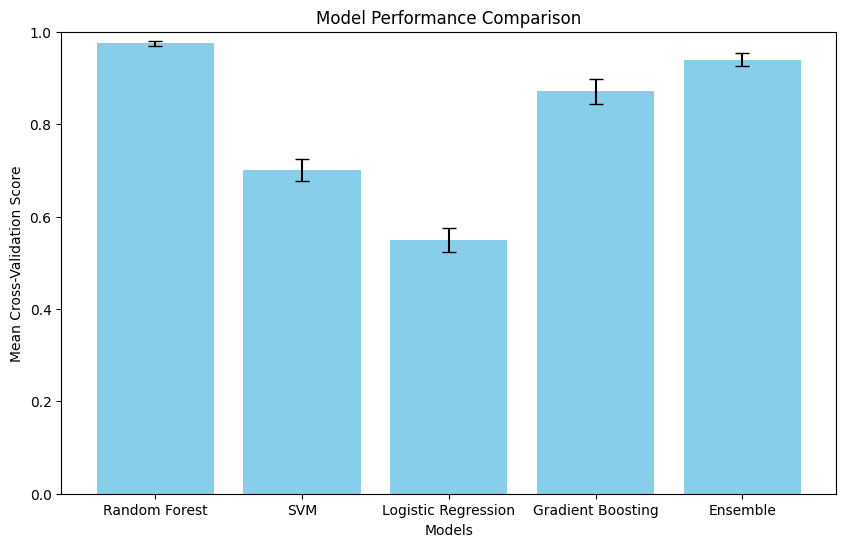

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting', 'Ensemble']

# Mean cross-validation scores
mean_scores = [0.9751, 0.7010, 0.5490, 0.8714, 0.9397]

# Standard deviation of cross-validation scores
std_devs = [0.0054, 0.0244, 0.0257, 0.0271, 0.0144]

# Plotting the mean cross-validation scores with error bars
plt.figure(figsize=(10, 6))
plt.bar(models, mean_scores, yerr=std_devs, capsize=5, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()